# RNA-Seq Data Classification for Disease Prediction

## 0. Introduction

In this notebook, we aim to build a multiclass classifier to predict whether an individual is healthy, has rheumatoid arthritis (RA), or has systemic lupus erythematosus (SLE) based on RNA-seq data. We will also identify key genes contributing to each condition.

## 1. Data Loading and Initial Setup

First, we'll load the RNA-seq datasets for RA, SLE, and healthy controls. We'll also display the shapes of the datasets to understand their dimensions.

In [1]:
# Import the required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the datasets for RA
ra_train = pd.read_csv('dataset/ra_train_data.tsv', sep='\t', index_col=0)
ra_test = pd.read_csv('dataset/ra_test_data.tsv', sep='\t', index_col=0)

In [3]:
# Load the datasets for SLE
sle_train = pd.read_csv('dataset/sle_train_data.tsv', sep='\t', index_col=0)
sle_test = pd.read_csv('dataset/sle_test_data.tsv', sep='\t', index_col=0)

In [4]:
# Load the datasets for healthy controls
healthy_train = pd.read_csv('dataset/healthy_train_data.tsv', sep='\t', index_col=0)
healthy_test = pd.read_csv('dataset/healthy_test_data.tsv', sep='\t', index_col=0)

In [5]:
# Display the shapes of the datasets
print("RA Train Shape:", ra_train.shape)
print("RA Test Shape:", ra_test.shape)
print("SLE Train Shape:", sle_train.shape)
print("SLE Test Shape:", sle_test.shape)
print("Healthy Train Shape:", healthy_train.shape)
print("Healthy Test Shape:", healthy_test.shape)

RA Train Shape: (1587, 37691)
RA Test Shape: (330, 37691)
SLE Train Shape: (1332, 37691)
SLE Test Shape: (465, 37691)
Healthy Train Shape: (302, 24403)
Healthy Test Shape: (100, 24403)


In [6]:
# Preview the first few rows of the RA training data
ra_train.head(5)

,DDX11L1,WASH7P,MIR6859-1,MIR1302-2HG,MIR1302-2,FAM138A,OR4F5,WASH9P,LOC729737,DDX11L17,...,ND4,TRNH,TRNS2,TRNL2,ND5,ND6,TRNE,CYTB,TRNT,TRNP
GSE183154_GSM5552159,0.0,18.960,19.390,0.0,0.0,0.0,0.0,0.000,3.624,0.0,...,4600.0,240.20,264.40,201.10,1924.0,2050.0,1123.0,1648.0,149.00,828.9
GSE183154_GSM5552160,0.0,9.083,6.972,0.0,0.0,0.0,0.0,0.000,1.670,0.0,...,5955.0,353.10,384.40,289.70,2588.0,2500.0,1317.0,2436.0,270.60,940.5
GSE183154_GSM5552161,0.0,26.340,36.230,0.0,0.0,0.0,0.0,1.299,6.757,0.0,...,3136.0,120.30,117.00,83.54,1519.0,1554.0,852.5,1311.0,67.29,577.5
GSE183154_GSM5552162,0.0,10.020,5.382,0.0,0.0,0.0,0.0,0.000,1.538,0.0,...,4703.0,265.60,284.80,223.80,2081.0,2112.0,1092.0,1793.0,193.20,804.6
GSE135635_GSM4024030,0.0,19.690,6.388,0.0,0.0,0.0,0.0,0.000,4.555,0.0,...,2123.0,40.29,47.12,54.45,1114.0,1517.0,905.3,1040.0,140.20,685.4


In [7]:
# Preview the first few rows of the SLE training data
sle_train.head(5)

,DDX11L1,WASH7P,MIR6859-1,MIR1302-2HG,MIR1302-2,FAM138A,OR4F5,WASH9P,LOC729737,DDX11L17,...,ND4,TRNH,TRNS2,TRNL2,ND5,ND6,TRNE,CYTB,TRNT,TRNP
GSE63755_GSM1556699,0.0,5.085,4.574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2467.0,27.74,38.52,31.00,1016.0,1015.0,606.1,1110.0,64.89,120.30
GSE63755_GSM1556700,0.0,5.090,4.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3496.0,30.16,42.52,29.31,1389.0,1458.0,777.6,1715.0,83.09,135.60
GSE63755_GSM1556701,0.0,7.666,4.897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1271.0,33.78,43.61,29.84,524.9,599.5,280.3,808.0,17.89,24.93
GSE63755_GSM1556702,0.0,4.574,3.967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3886.0,51.72,68.58,49.68,1703.0,1660.0,946.3,1823.0,109.70,168.40
GSE63755_GSM1556703,0.0,6.321,4.730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3344.0,40.86,49.07,35.98,1244.0,1258.0,700.1,1466.0,92.31,160.60


In [8]:
# Preview the first few rows of the healthy training data
healthy_train.head(5)

,A1BG,NAT2,ADA,CDH2,AKT3,GAGE12F,POU5F1P5,ZBTB11-AS1,MED6,NR2E3,...,HNRNPDL,DMTF1,PPP4R1,CDH1,SLC12A6,PTBP3,KCNE2,DGCR2,CASP8AP2,SCO2
Whole blood_GTEX-111YS-0006-SM-5NQBE,0.00000,0.0,3.88814,0.0,0.00000,0.0,0.0,0.0,4.92819,0.0,...,23.24507,2.13643,34.75098,0.0,22.39149,12.44287,0.0,39.58995,0.00000,1.13295
Whole blood_GTEX-1122O-0005-SM-5O99J,0.00000,0.0,1.65673,0.0,0.00000,0.0,0.0,0.0,3.89626,0.0,...,21.88482,3.95634,71.26230,0.0,37.87207,28.15679,0.0,50.57634,0.00000,1.13876
Whole blood_GTEX-1128S-0005-SM-5P9HI,0.00000,0.0,16.21627,0.0,3.32589,0.0,0.0,0.0,2.62014,0.0,...,54.36664,6.23021,8.86212,0.0,15.24723,14.77119,0.0,18.75518,0.00000,1.39118
Whole blood_GTEX-113IC-0006-SM-5NQ9C,0.00000,0.0,30.64359,0.0,2.97533,0.0,0.0,0.0,8.18075,0.0,...,62.51887,9.47645,25.05536,0.0,18.20504,19.98922,0.0,36.60574,4.42993,8.31288
Whole blood_GTEX-11DXW-0006-SM-5NQ7Y,1.53009,0.0,20.60155,0.0,1.65279,0.0,0.0,0.0,4.07246,0.0,...,43.25663,3.04311,13.00231,0.0,8.70691,14.95775,0.0,17.32560,0.00000,2.09525


In [9]:
# Check for consistency in gene names across datasets
print("Number of genes in RA Train:", len(ra_train.columns))
print("Number of genes in SLE Train:", len(sle_train.columns))
print("Number of genes in Healthy Train:", len(healthy_train.columns))

Number of genes in RA Train: 37691
Number of genes in SLE Train: 37691
Number of genes in Healthy Train: 24403


In [10]:
# Display a list of gene names in each dataset (first 10 genes)
print("First 10 genes in RA Train:", list(ra_train.columns[:10]))
print("\nFirst 10 genes in SLE Train:", list(sle_train.columns[:10]))
print("\nFirst 10 genes in Healthy Train:", list(healthy_train.columns[:10]))

First 10 genes in RA Train: ['DDX11L1', 'WASH7P', 'MIR6859-1', 'MIR1302-2HG', 'MIR1302-2', 'FAM138A', 'OR4F5', 'WASH9P', 'LOC729737', 'DDX11L17']

First 10 genes in SLE Train: ['DDX11L1', 'WASH7P', 'MIR6859-1', 'MIR1302-2HG', 'MIR1302-2', 'FAM138A', 'OR4F5', 'WASH9P', 'LOC729737', 'DDX11L17']

First 10 genes in Healthy Train: ['A1BG', 'NAT2', 'ADA', 'CDH2', 'AKT3', 'GAGE12F', 'POU5F1P5', 'ZBTB11-AS1', 'MED6', 'NR2E3']


### Observations

- **Number of Genes**:
  - *RA Train*: Approximately 37,691 genes.
  - *SLE Train*: Approximately 37,691 genes.
  - *Healthy Train*: Approximately 24,403 genes.

- **Gene Names**:
  - The first 10 gene names differ between the RA/SLE datasets and the Healthy dataset.

This indicates that the gene names are **not consistent across datasets**, and we need to align the datasets by finding the intersection of common genes shared among all datasets.

## 2. Data Alignment and Preprocessing

### 2.1. Align Features Across Datasets

Since the gene names are not consistent across datasets, as well as the number of genes are different for the healthy dataset, we need to align the features by finding the intersection of common genes shared among all datasets. This will ensure that we have the same set of features for all samples and that each sample is represented in the same feature space.

In [11]:
# Extract gene lists from each dataset
ra_genes = set(ra_train.columns)
sle_genes = set(sle_train.columns)
healthy_genes = set(healthy_train.columns)

# Find the intersection of genes present in all datasets
common_genes = list(ra_genes & sle_genes & healthy_genes)

print("Number of common genes across all datasets:", len(common_genes))

Number of common genes across all datasets: 24403


In [12]:
# Subset each dataset to keep only the common genes
ra_train = ra_train[common_genes]
ra_test = ra_test[common_genes]
sle_train = sle_train[common_genes]
sle_test = sle_test[common_genes]
healthy_train = healthy_train[common_genes]
healthy_test = healthy_test[common_genes]

In [13]:
# Verify that all datasets now have the same number of genes
print("RA Train Shape after alignment:", ra_train.shape)
print("RA Test Shape after alignment:", ra_test.shape)
print("SLE Train Shape after alignment:", sle_train.shape)
print("SLE Test Shape after alignment:", sle_test.shape)
print("Healthy Train Shape after alignment:", healthy_train.shape)
print("Healthy Test Shape after alignment:", healthy_test.shape)

RA Train Shape after alignment: (1587, 24403)
RA Test Shape after alignment: (330, 24403)
SLE Train Shape after alignment: (1332, 24403)
SLE Test Shape after alignment: (465, 24403)
Healthy Train Shape after alignment: (302, 24403)
Healthy Test Shape after alignment: (100, 24403)


In [14]:
# Display a list of gene names in each dataset (first 10 genes)
print("First 10 genes in RA Train after alignment:", list(ra_train.columns[:10]))
print("\nFirst 10 genes in SLE Train after alignment:", list(sle_train.columns[:10]))
print("\nFirst 10 genes in Healthy Train after alignment:", list(healthy_train.columns[:10]))

First 10 genes in RA Train after alignment: ['RABL2B', 'MRPL2', 'ALDOA', 'MAGEA3', 'TMPRSS2', 'SH3PXD2B', 'OPN1MW2', 'FAR2', 'LINC00544', 'LINC01134']

First 10 genes in SLE Train after alignment: ['RABL2B', 'MRPL2', 'ALDOA', 'MAGEA3', 'TMPRSS2', 'SH3PXD2B', 'OPN1MW2', 'FAR2', 'LINC00544', 'LINC01134']

First 10 genes in Healthy Train after alignment: ['RABL2B', 'MRPL2', 'ALDOA', 'MAGEA3', 'TMPRSS2', 'SH3PXD2B', 'OPN1MW2', 'FAR2', 'LINC00544', 'LINC01134']


### 2.2. Exploratory Data Analysis (EDA)

We'll perform a brief EDA to understand the characteristics of the data.

#### 2.2.1. Check Data Sparsity
We want to determine how sparse our data is, i.e., the proportion of zero values.

In [15]:
# Combine all training data for EDA
combined_train = pd.concat([ra_train, sle_train, healthy_train], ignore_index=True)

# Print the combined training data shape
print("Combined Training Data Shape:", combined_train.shape)

# Calculate sparsity (percentage of zero values)
sparsity = (combined_train == 0).sum().sum() / (combined_train.shape[0] * combined_train.shape[1]) * 100
print(f"\nData Sparsity: {sparsity:.2f}% zeros")

Combined Training Data Shape: (3221, 24403)

Data Sparsity: 57.68% zeros


#### 2.2.2. Visualize Gene Expression Distributions
We'll visualize the distribution of gene expression values for a random sample of genes to understand the overall data distribution. This means we'll plot histograms for a few randomly selected genes to see how the expression values are distributed, y x-axis represents the gene expression values, and the y-axis represents the frequency of those values.

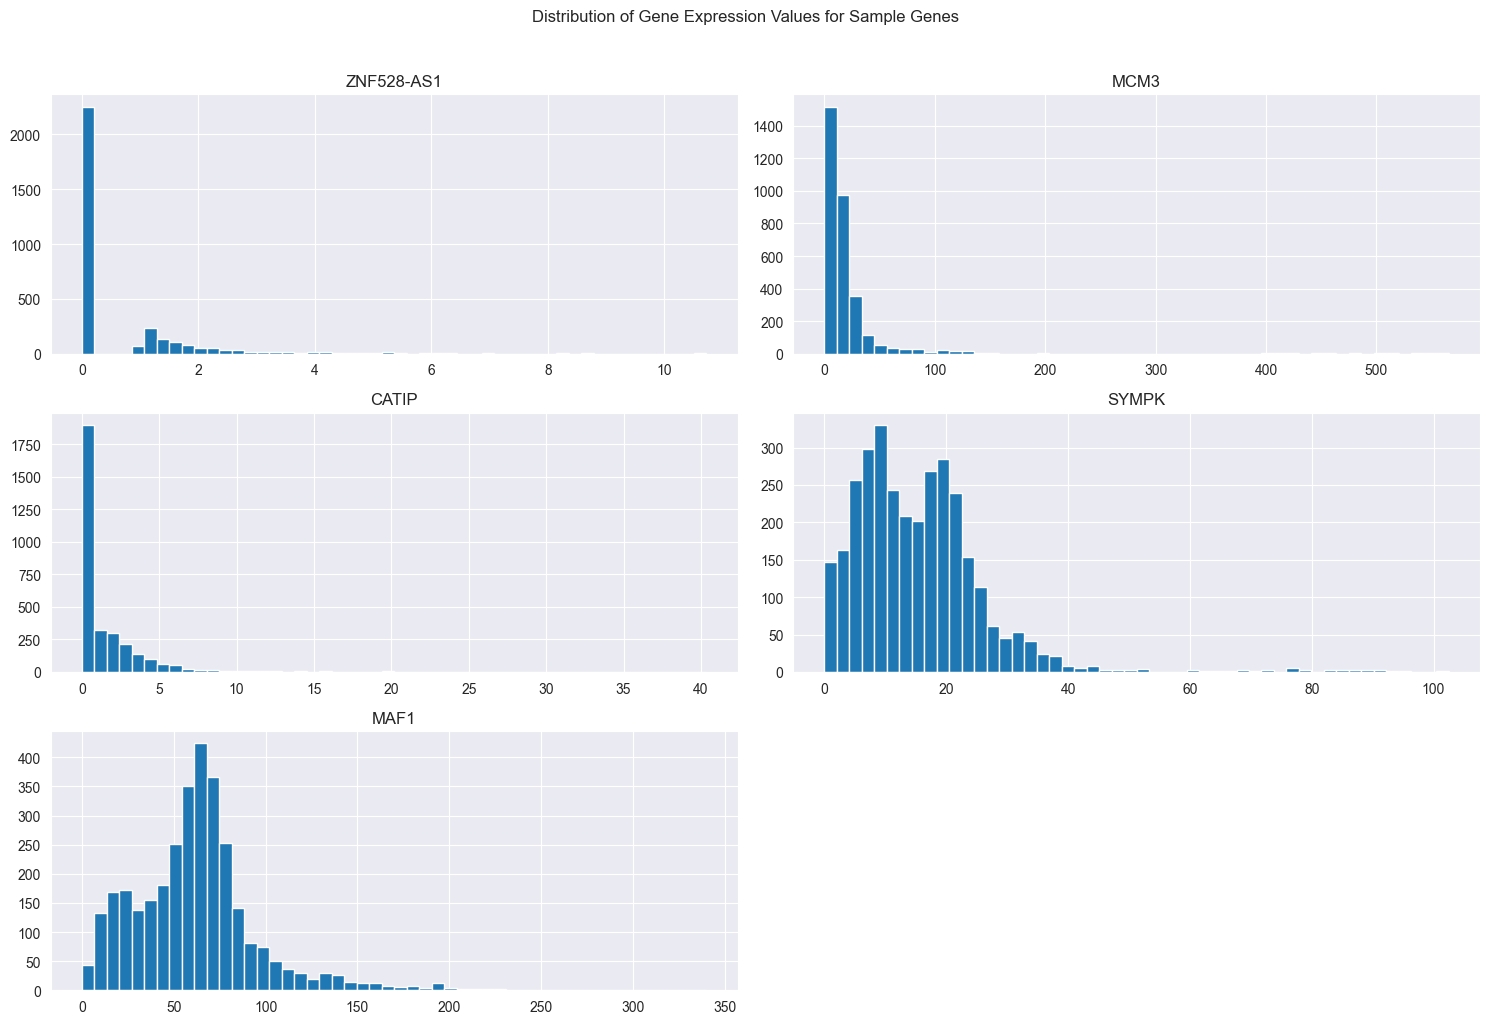

In [16]:
# Randomly select 5 genes to plot
np.random.seed(42)
sample_genes = np.random.choice(common_genes, size=5, replace=False)

# Plot histograms of the selected genes
combined_train[sample_genes].hist(figsize=(15, 10), bins=50)
plt.suptitle('Distribution of Gene Expression Values for Sample Genes', y=1.02)
plt.tight_layout()
plt.show()

#### 2.2.3. Assess Class Distribution
We need to check the number of samples in each class to assess for class imbalance.

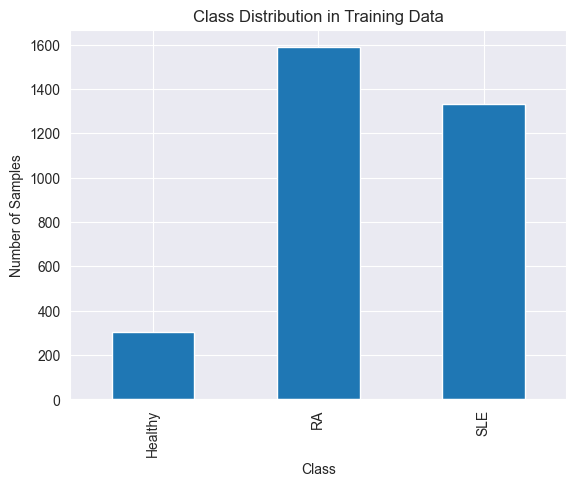

Number of samples in each class:
Healthy     302
RA         1587
SLE        1332
Name: count, dtype: int64


In [17]:
# Create labels for each dataset
ra_labels = pd.Series(1, index=ra_train.index)
sle_labels = pd.Series(2, index=sle_train.index)
healthy_labels = pd.Series(0, index=healthy_train.index)

# Combine labels
y_train = pd.concat([ra_labels, sle_labels, healthy_labels])

# Count samples in each class
class_counts = y_train.value_counts().sort_index()
class_counts.index = ['Healthy', 'RA', 'SLE']
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training Data')
plt.show()

print("Number of samples in each class:")
print(class_counts)

### 2.3. Data Transformation

#### 2.3.1. Apply Log Transformation

Based on our EDA findings, we'll apply a log2(x + 1) transformation to stabilize variance and reduce skewness in the gene expression values.

In [18]:
# Define a function for log transformation
def log_transform(df):
    df_log = np.log2(df + 1)
    return df_log


# Apply log transformation to all datasets
ra_train = log_transform(ra_train)
ra_test = log_transform(ra_test)
sle_train = log_transform(sle_train)
sle_test = log_transform(sle_test)
healthy_train = log_transform(healthy_train)
healthy_test = log_transform(healthy_test)

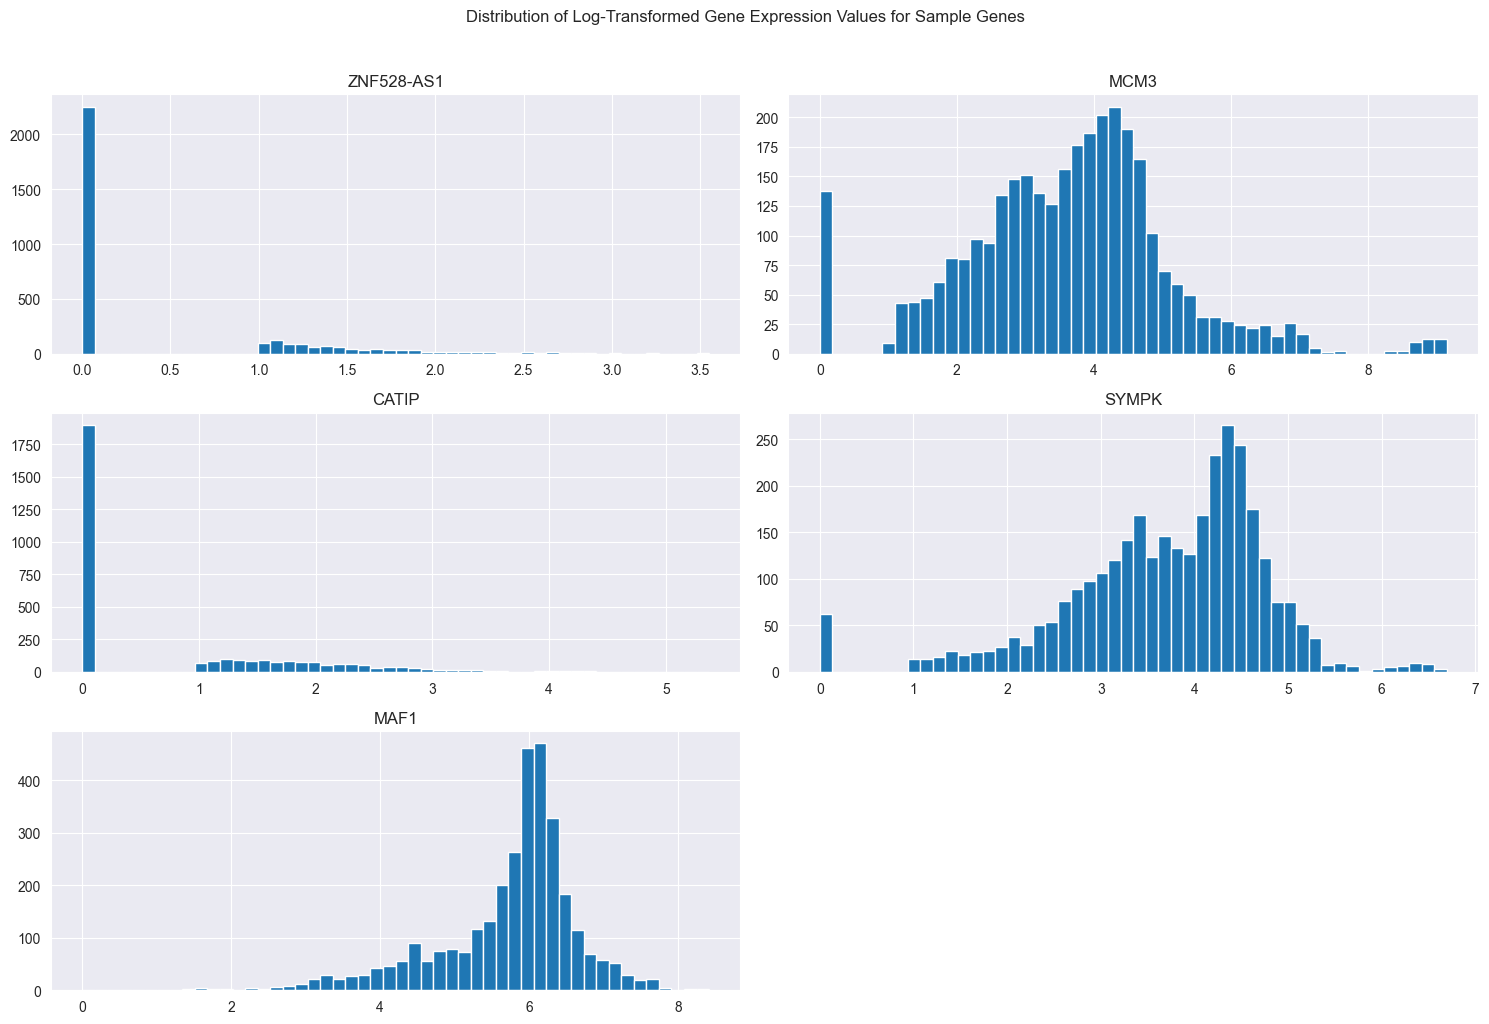

In [19]:
# Visualize the distribution of gene expression values after log transformation
combined_train = pd.concat([ra_train, sle_train, healthy_train], ignore_index=True)
combined_train[sample_genes].hist(figsize=(15, 10), bins=50)
plt.suptitle('Distribution of Log-Transformed Gene Expression Values for Sample Genes', y=1.02)
plt.tight_layout()
plt.show()

#### 2.3.2. Combine Datasets and Assign Labels
Now, we'll prepare the data for modeling by assigning labels to each dataset and combining them.

In [20]:
# Assign labels
ra_train['label'] = 1
ra_test['label'] = 1
sle_train['label'] = 2
sle_test['label'] = 2
healthy_train['label'] = 0
healthy_test['label'] = 0

# Combine datasets
train_data = pd.concat([ra_train, sle_train, healthy_train], ignore_index=True)
test_data = pd.concat([ra_test, sle_test, healthy_test], ignore_index=True)

# Separate features and labels
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

# Display the shapes of the combined datasets
print("Combined Train Data Shape:", train_data.shape)
print("Combined Test Data Shape:", test_data.shape)

Combined Train Data Shape: (3221, 24404)
Combined Test Data Shape: (895, 24404)
